In [53]:
# import data
import pandas as pd
penglings = pd.read_csv("penglings.csv")

# make sure it imported correctly
print(penglings.head())

   Unnamed: 0 species     island  bill_length_mm  bill_depth_mm  \
0           1  Adelie  Torgersen            39.1           18.7   
1           2  Adelie  Torgersen            39.5           17.4   
2           3  Adelie  Torgersen            40.3           18.0   
3           4  Adelie  Torgersen             NaN            NaN   
4           5  Adelie  Torgersen            36.7           19.3   

   flipper_length_mm  body_mass_g     sex  year  
0              181.0       3750.0    male  2007  
1              186.0       3800.0  female  2007  
2              195.0       3250.0  female  2007  
3                NaN          NaN     NaN  2007  
4              193.0       3450.0  female  2007  


In [56]:
from sklearn.preprocessing import MinMaxScaler

# drop nan values
penglings_no_nan = penglings.dropna(subset = ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species'])

# check
print(penglings_no_nan.head())

# scale bill length to dynamically size better
scaler = MinMaxScaler(feature_range = (50, 200))
s = scaler.fit_transform(penglings_no_nan[['bill_length_mm']]).flatten()
penglings_no_nan['scaled_bill_length'] = s

   Unnamed: 0 species     island  bill_length_mm  bill_depth_mm  \
0           1  Adelie  Torgersen            39.1           18.7   
1           2  Adelie  Torgersen            39.5           17.4   
2           3  Adelie  Torgersen            40.3           18.0   
4           5  Adelie  Torgersen            36.7           19.3   
5           6  Adelie  Torgersen            39.3           20.6   

   flipper_length_mm  body_mass_g     sex  year  
0              181.0       3750.0    male  2007  
1              186.0       3800.0  female  2007  
2              195.0       3250.0  female  2007  
4              193.0       3450.0  female  2007  
5              190.0       3650.0    male  2007  


C:\Users\rrcon\AppData\Local\Temp\ipykernel_29152\313986502.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penglings_no_nan['scaled_bill_length'] = s


In [64]:
# using altair for this iteration
import altair as alt

# add point selection options
multi = alt.selection_multi()

# plot the data
peng_plot = alt.Chart(penglings_no_nan).mark_circle().encode(
    x = alt.X('flipper_length_mm', title = "Flipper Length (mm)").scale(zero = False),
    y = alt.Y('body_mass_g', title = "Body Mass (g)").scale(zero = False),
    color = alt.condition(multi, 'species', alt.value('lightgray')),
    size = 'scaled_bill_length',
    tooltip = 'species'
).configure_mark(
    opacity = 0.8
).add_selection(
    multi
).interactive()

peng_plot

C:\Users\rrcon\AppData\Local\Temp\ipykernel_29152\3763184874.py:5: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use selection_point instead.
  multi = alt.selection_multi()
C:\Users\rrcon\AppData\Local\Temp\ipykernel_29152\3763184874.py:16: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use add_params instead.
  ).add_selection(


alt.Chart(...)

In [59]:
peng_plot.save("altair_plot.png")

In [60]:
# use matplotlib for next iteration
import matplotlib.pyplot as plt

# set some variables to make things easier
x = penglings_no_nan['flipper_length_mm']
y = penglings_no_nan['body_mass_g']
cmap = 'tab20b'
alpha = 0.8

# map species data to numbers
mappings = {"Adelie": 0,
            "Chinstrap": 1,
            "Gentoo": 2}

penglings_no_nan['species_map'] = penglings_no_nan['species'].map(mappings)

print(penglings_no_nan.head())

c = penglings_no_nan['species_map']

   Unnamed: 0 species     island  bill_length_mm  bill_depth_mm  \
0           1  Adelie  Torgersen            39.1           18.7   
1           2  Adelie  Torgersen            39.5           17.4   
2           3  Adelie  Torgersen            40.3           18.0   
4           5  Adelie  Torgersen            36.7           19.3   
5           6  Adelie  Torgersen            39.3           20.6   

   flipper_length_mm  body_mass_g     sex  year  scaled_bill_length  \
0              181.0       3750.0    male  2007           88.181818   
1              186.0       3800.0  female  2007           90.363636   
2              195.0       3250.0  female  2007           94.727273   
4              193.0       3450.0  female  2007           75.090909   
5              190.0       3650.0    male  2007           89.272727   

   species_map  
0            0  
1            0  
2            0  
4            0  
5            0  


C:\Users\rrcon\AppData\Local\Temp\ipykernel_29152\3208247407.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penglings_no_nan['species_map'] = penglings_no_nan['species'].map(mappings)


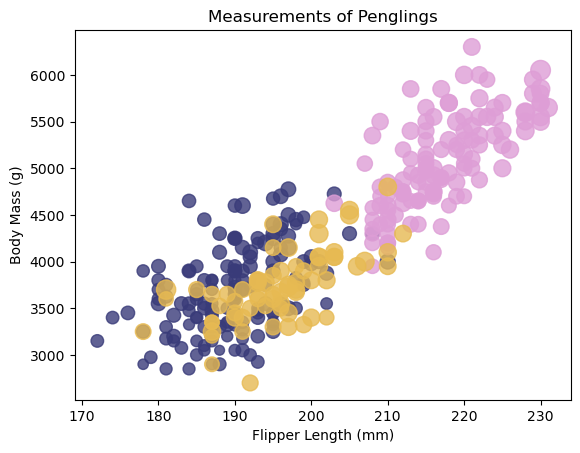

In [61]:
# plot graph using matplotlib library
plt.scatter(x, y,
            c = c,
            cmap = cmap,
            s = s,
            alpha = alpha)
plt.title("Measurements of Penglings")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()